In [2]:
library(pheatmap)
library(RColorBrewer)
library(viridis)
library(tidyverse)

In [3]:
save_pheatmap_png <- function(x, filename, width=1200, height=1000, res = 200) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

In [4]:
save_prefix = '../data/processed/fig3_footprinting/'

# get tf information

In [5]:
annon_df = read.csv('../data/external/HOCOMOCOv11_annotation.csv',row.names=1,stringsAsFactors=F)
head(annon_df)

,id,tf
,<chr>,<chr>
0,AHR_HUMAN.H11MO.0.B,AHR
1,AIRE_HUMAN.H11MO.0.C,AIRE
2,ALX1_HUMAN.H11MO.0.B,ALX1
3,ALX3_HUMAN.H11MO.0.D,ALX3
4,ALX4_HUMAN.H11MO.0.D,ALX4
5,ANDR_HUMAN.H11MO.0.A,AR


In [6]:
# annon_df$tf

In [7]:
cell_type_tf_df= read.csv('../data/external/transcription_factor_info.csv',stringsAsFactors=F)
cell_type_tfs = unique(cell_type_tf_df$tf)
cell_type_tfs = cell_type_tfs[cell_type_tfs %in% annon_df$tf ]
length(cell_type_tfs)

[1] 104

In [8]:
cell_type_tfs_sel = unique(data.frame(cell_type_tf_df %>% filter(cell_type %in% c('B-lymphocytes', 'Keratinocytes','Melanocytes','Astrocytes')))$tf)
cell_type_tfs_sel = cell_type_tfs_sel[cell_type_tfs_sel %in% annon_df$tf]
length(cell_type_tfs_sel)

[1] 63

In [9]:
scores = read.csv('../data/processed/fig3_footprinting/scores_all_foot_norm.csv',row.names=1, check.names = FALSE)
log_scores = log2(scores+1e-2)
log_scores_norm = as.data.frame(scale(log_scores, center = TRUE, scale = TRUE))

dim(scores)

[1]  10 678

In [10]:
# sort(apply(scores,2,sd),decreasing=TRUE)

pdf 
  2

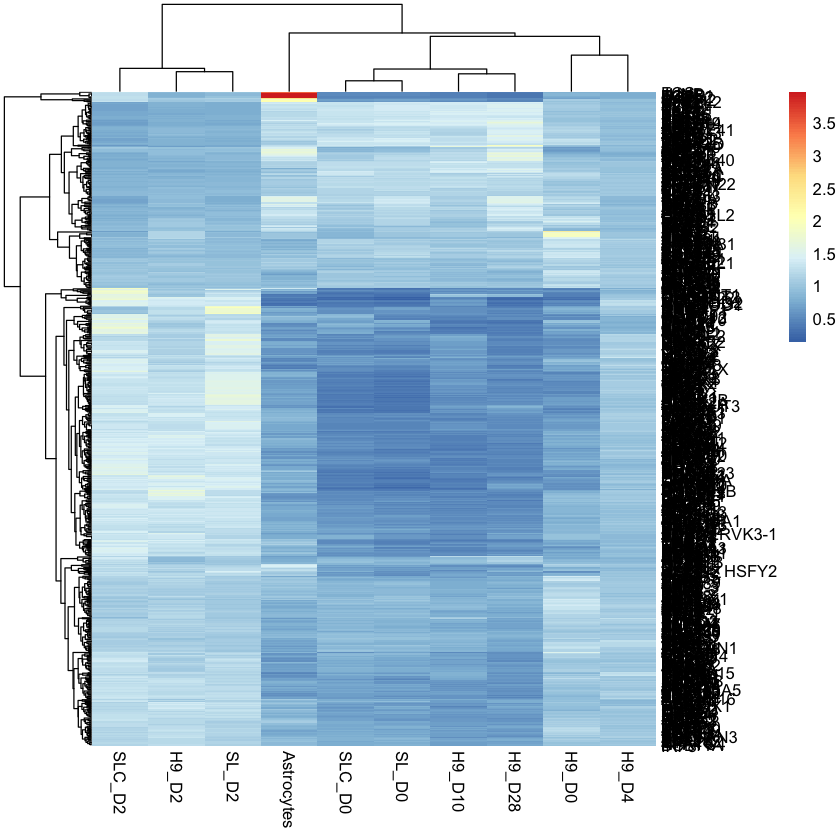

pdf 
  2

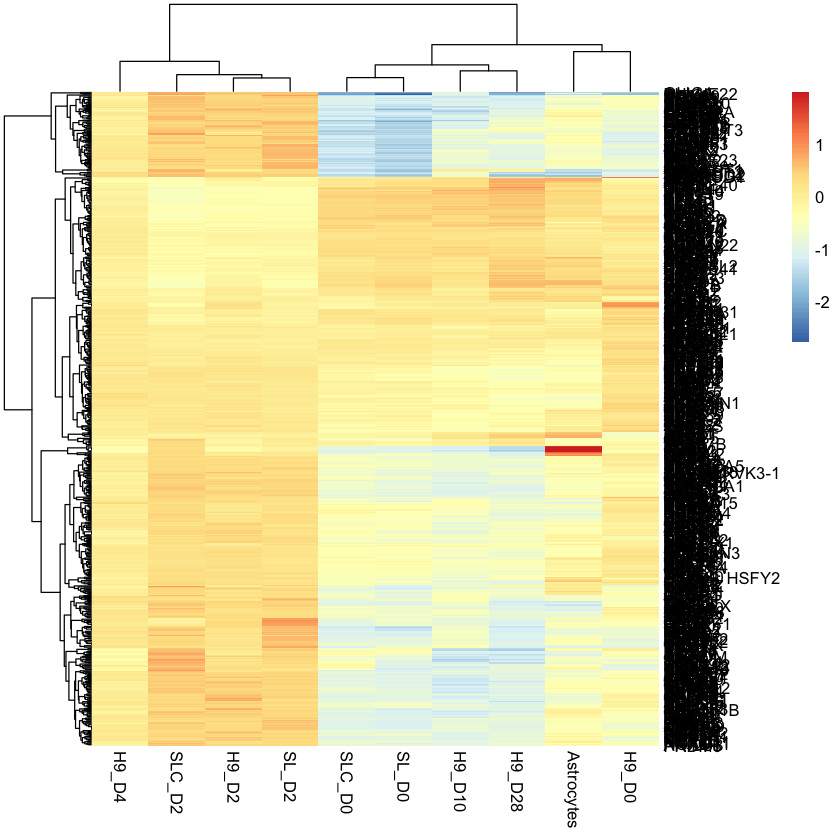

pdf 
  2

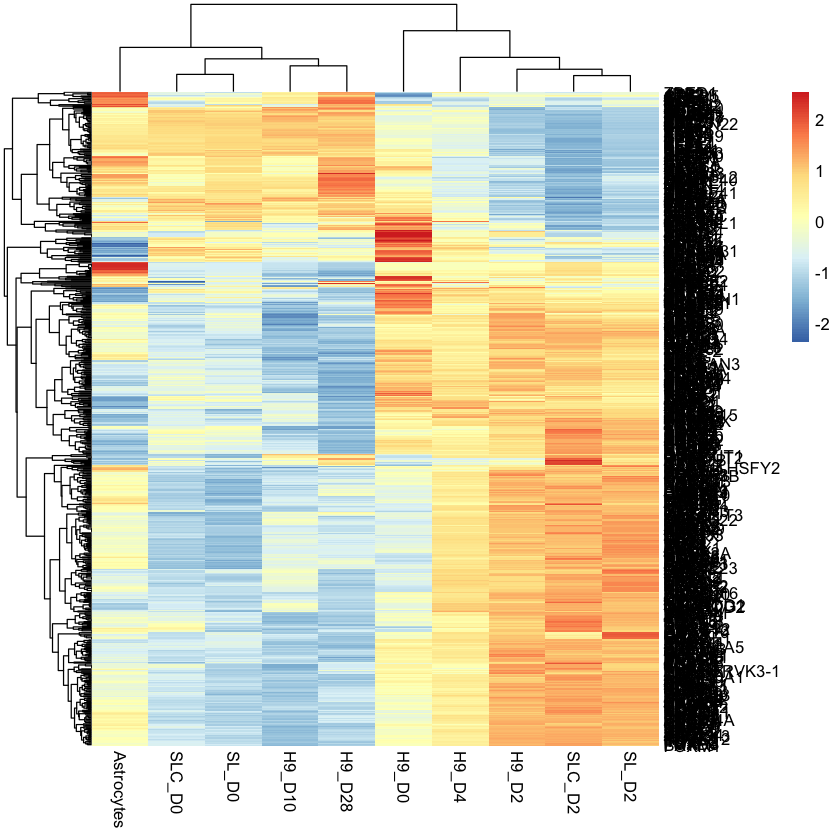

In [86]:
p = pheatmap(t(scores))
save_pheatmap_pdf(p, paste0(save_prefix, 'footprint_count_heatmap_raw.pdf'), width=10, height=80) 
p = pheatmap(t(log_scores))
save_pheatmap_pdf(p, paste0(save_prefix, 'footprint_count_heatmap_log.pdf'), width=10, height=80) 
p = pheatmap(t(log_scores_norm))
save_pheatmap_pdf(p, paste0(save_prefix, 'footprint_count_heatmap_lognorm.pdf'), width=10, height=80) 

In [11]:
high_max_tfs = colnames(log_scores)[apply(log_scores,2,max)>.7]

In [12]:
high_sd_tfs = colnames(log_scores)[apply(log_scores,2,sd)>.7]

In [14]:
scores_tf_sel = log_scores_norm%>%dplyr::select(cell_type_tfs_sel)
scores_tf_sel = log_scores_norm%>%dplyr::select(high_max_tfs)

scores_tf_sel_tissue = scores_tf_sel[c("H9_D0","H9_D2", "H9_D4", 'H9_D10','H9_D28'),]

In [90]:
# tf_to_tissue_df = cell_type_tf_df %>%
#     filter(tf %in% colnames(scores_tf_sel))%>%
#     select(cell_type,tf)%>%
#     distinct()%>%
#     group_by(tf)%>%
#     mutate(groups = paste0(cell_type, collapse = "|")) %>%
#     select(tf,groups)%>%
#     distinct()%>%
#     column_to_rownames('tf')

pdf 
  2

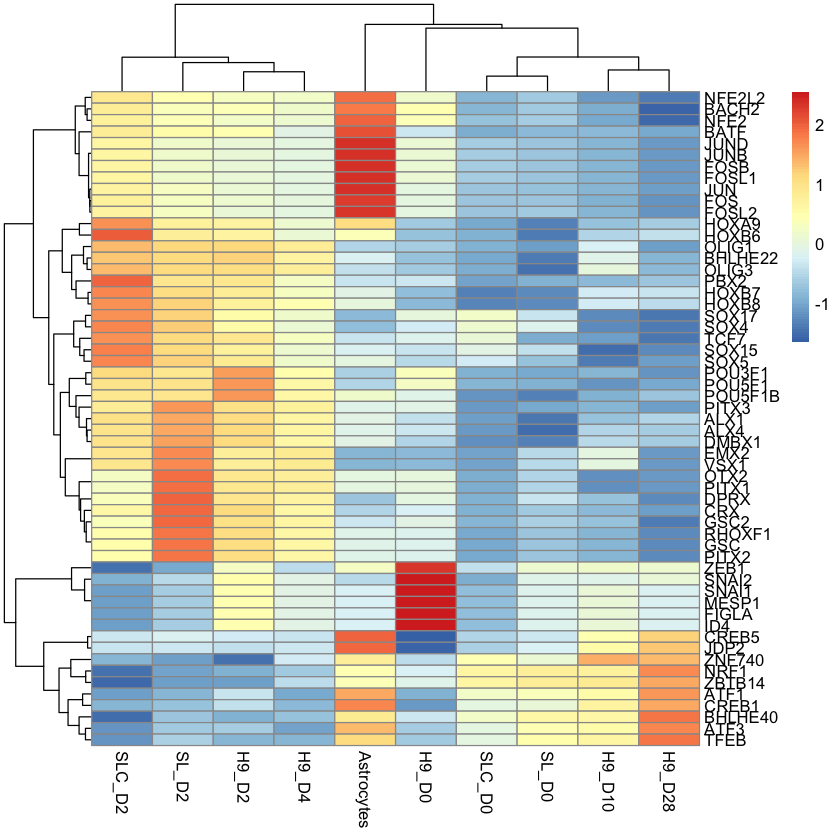

In [91]:
p_seltf_all = pheatmap(t(scores_tf_sel))
save_pheatmap_pdf(p_seltf_all, paste0(save_prefix, 'footprint_count_heatmap_seltf_alltissues.pdf'), width=10, height=12) 

pdf 
  2

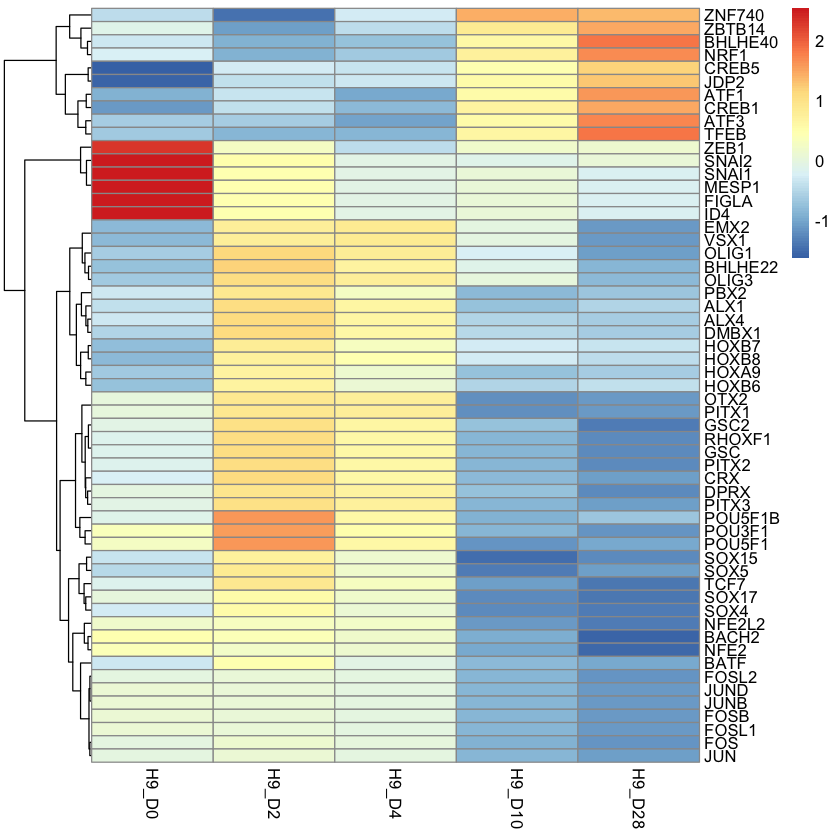

In [92]:
p_seltf = pheatmap(t(scores_tf_sel_tissue),cluster_col=F)
save_pheatmap_pdf(p_seltf, paste0(save_prefix, 'footprint_count_heatmap_sel_H9.pdf'), width=10, height=12) 

In [94]:
select_tfs = c('SOX1','PAX6','OTX2','LHX5','IRX3','POU3F2','DLK1','MAP2','CDH2',
              'EOMES','TBXT','TBX6','SOX17','GATA4','FOXD3','SNAI1','SNAI2','NANOG','POU5F1',
              'SMAD7','ID1','LEFTY2','ATF3','FOS','FOSB','EGR1','EGR2','EGR3')
select_tf_types = c('Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural','Neural',
              'Mesoderm','Mesoderm','Mesoderm','Endoderm','Endoderm','Neural Crest','Neural Crest','Neural Crest','Pluripotent','Pluripotent',
              'Nodal','Nodal','Nodal','Early','Early','Early','Early','Early','Early')
annon_df = data.frame(type=select_tf_types)
rownames(annon_df) = select_tfs

modified 2/16/2021:

For Figure 2B, I would check the TPM for some of the transcription factors to eliminate detection of foot-printing (or motif enrichment?). For the Hox genes (HOXA10, A13, A9, A5, C6) have very negligible expression in all other populations except SLC (posterior NSC), I would remove them based on RNA-seq expression level alone. For Sox family gene, it is worth showing Sox2 and Sox4 and remove Sox17 as I don’t see expression in H9, SL, SLC.
 


In [31]:
neuro_tfs = c("NANOG"   ,  "NEUROD1" ,     "PAX6"  , 
              "CTCF"      ,    "TCF4"    , "RFX1",  
              "EBF1"          ,  "RFX2"   ,    "RFX3", 
              "CUX1"      ,     "ONECUT1"    ,   "ONECUT2", 
              "JUN",   "JUNB"  ,   "JUND",   "FOS", "BACH1",
              "RUNX1", "RUNX2" , "TEAD1"   , "TEAD3",  "TEAD4"   ,  
              "SP1", "LHX2"    ,  "LHX3"   , "MAF","MAFK","PITX1","ATF3" , "NFIA",
          "SOX2"         ,       "SOX4"      ,         
              "SOX9"     ,     "FOXD1"  ,  "BHLHE40", "BHLHE41"  ,   
              "ZIC1"     ,  "FOXC1","IRF5",   "GLI1",      "ZIC2"      ,    
              "PAX5","RUNX1","RUNX2","RUNX3","MAX", "KLF4",
              "ATF1", "ESR2","RARB",   "ZIC3"  )
neuro_tfs = unique(sort(neuro_tfs))
# sort(neuro_tfs)
length(neuro_tfs)


[1] 49

In [32]:
# select_tfs_with_footprint_data = select_tfs[(select_tfs %in% colnames(scores))]
select_tfs_with_footprint_data = neuro_tfs[(neuro_tfs %in% colnames(scores))]
# select_tfs_with_footprint_data

In [33]:
sel_tissues = c('Astrocytes','H9_D0','H9_D2','H9_D4','H9_D10','H9_D28','SLC_D0','SL_D0')

pdf 
  2

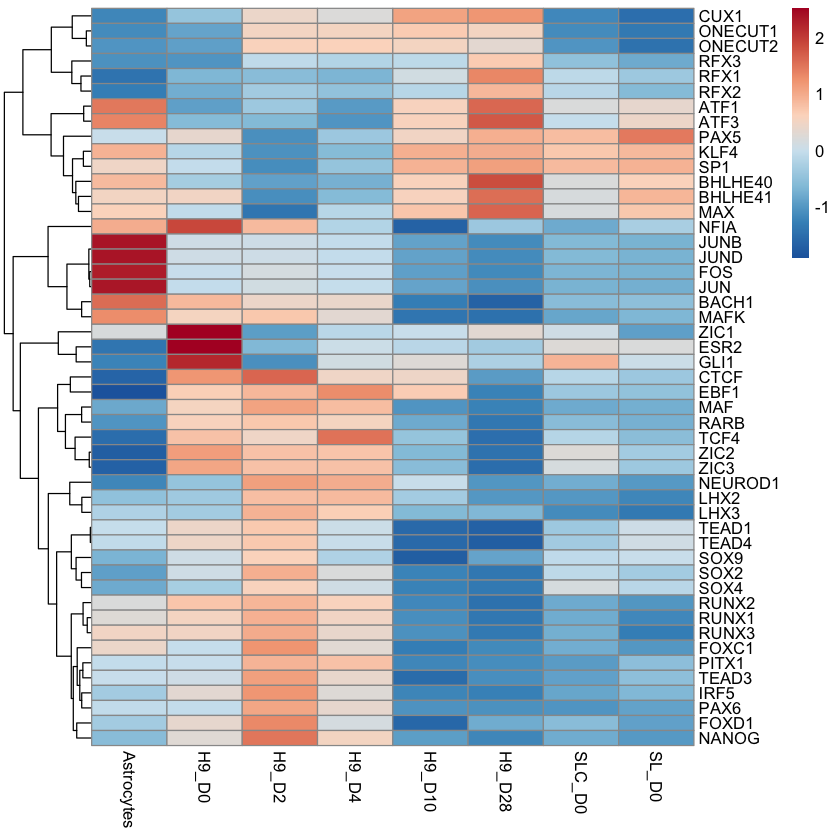

In [34]:
p = pheatmap(t(log_scores_norm[,select_tfs_with_footprint_data])[,sel_tissues],
         cluster_row=T,
         cluster_col=F,
               color = colorRampPalette(rev(brewer.pal(n =8, name ="RdBu")))(255)
            )#,
#         annotation_row=annon_df)
save_pheatmap_pdf(p, paste0(save_prefix, 'footprint_count_heatmap_lognorm_neuroTFs.pdf'), width=4, height=8) 


GLI1 provides posterior patterning

In [78]:
foot= read.csv('../data/processed/fig3_footprinting/scores_all_sel_foot_norm.csv',row.names=1, check.names = FALSE)

dim(foot)

[1]   6 678

pdf 
  2

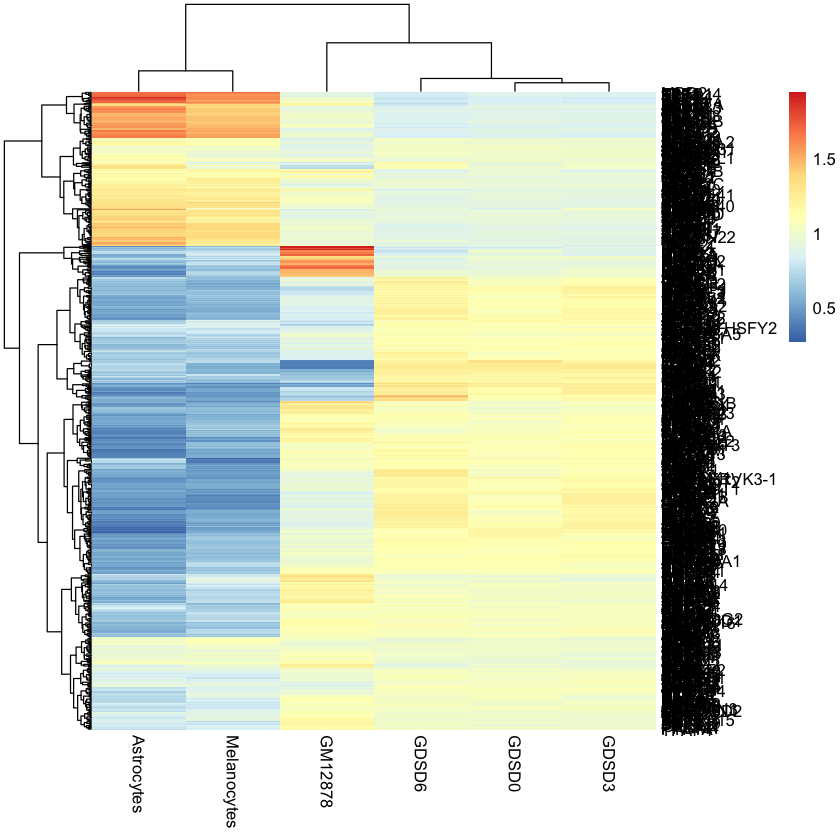

In [79]:
p_foot = pheatmap(t(foot))
save_pheatmap_pdf(p_foot, paste0(save_prefix, 'footprint_count_heatmap.pdf'), width=10, height=80) 

In [80]:
foot_tf_sel = foot%>%dplyr::select(cell_type_tfs_sel)
foot_tf_sel = foot_tf_sel[c("GDSD6","Melanocytes", "Astrocytes", 'GM12878'),]

pdf 
  2

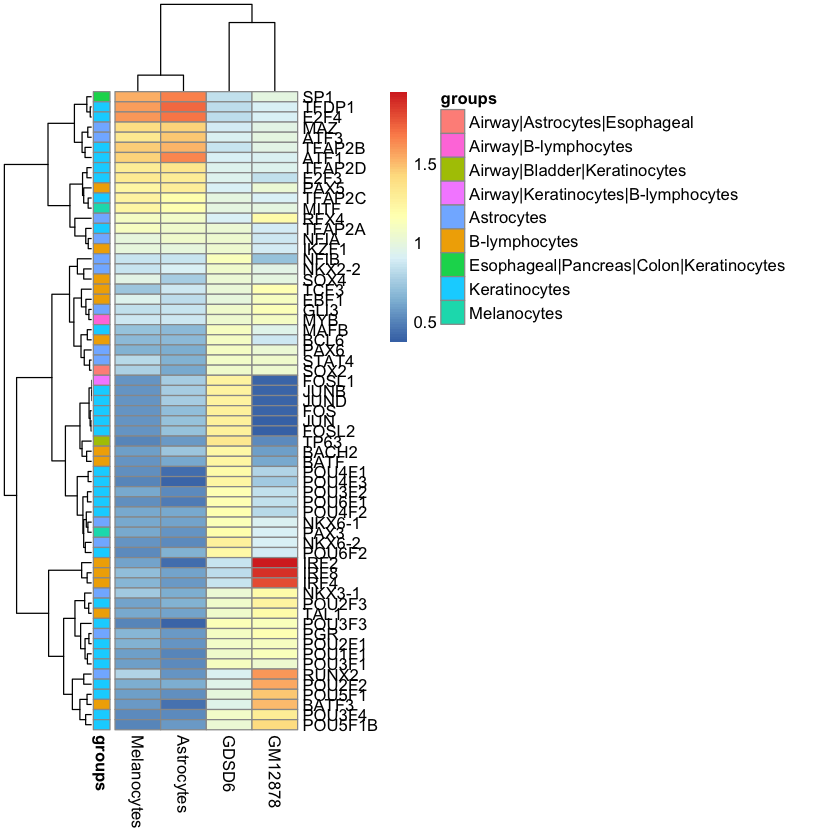

In [81]:
p_foot_seltf = pheatmap(t(foot_tf_sel),
                annotation_row = tf_to_tissue_df)
save_pheatmap_pdf(p_foot_seltf, paste0(save_prefix, 'footprint_count_heatmap_sel_annon.pdf'), width=10, height=12) 

In [73]:
foot_all= read.csv('../data/processed/fig3_footprinting/scores_all_foot_all_tissue_piv_norm.csv',row.names=1, check.names = FALSE)

dim(foot_all)

[1]  17 678

pdf 
  2

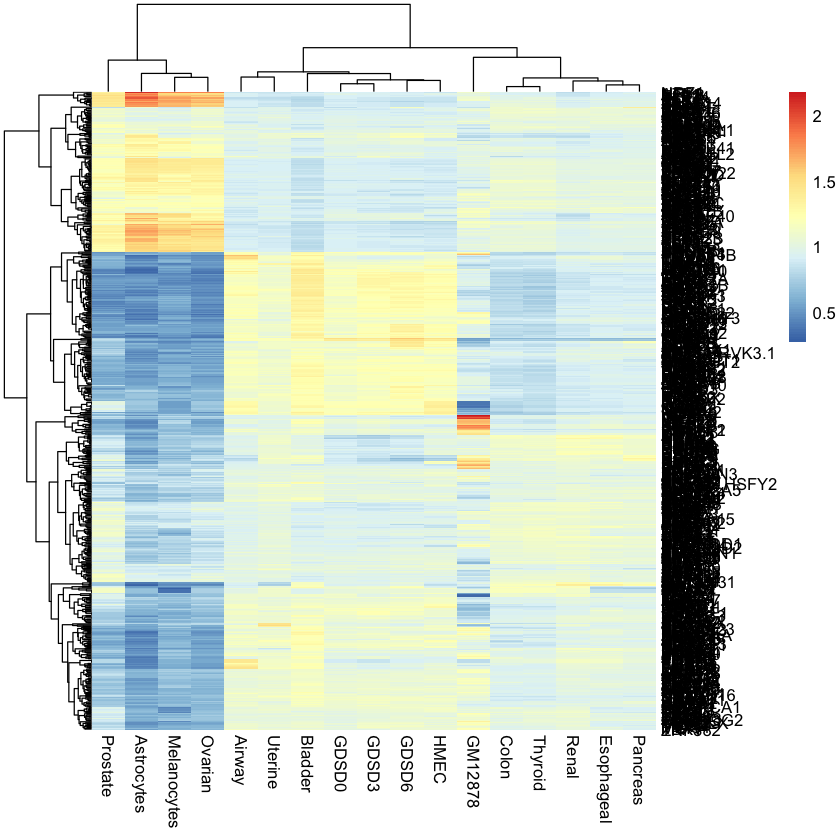

In [36]:
p_foot_all = pheatmap(t(foot_all))
save_pheatmap_pdf(p_foot_all, paste0(save_prefix, 'footprint_all_count_heatmap.pdf'), width=20, height=80) 